# Ajuste de modelos via cuadrados mínimos usando PyTorch

## Ejercicio 1)

Instale `pytorch` usando el comando de bash

In [2]:
!pip3 install torch torchvision torchaudio torchviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
    --------------------------------------- 2.1/109.3 MB 11.7 MB/s eta 0:00:10
   - -------------------------------------- 4.7/109.3 MB 11.9 MB/s eta 0:00:09
   -- ------------------------------------- 7.1/109.3 MB 11.8 MB/s eta 0:00:09
   --- ------------------------------------ 9.7/109.3 MB 11.6 MB/s eta 0:00:09
   ---- ----------------------------------- 12.1/109.3 MB 11.8 MB/s eta 0:00:09
   ----- ---------------------------------- 14.7/109.3 MB 11.7 MB/s eta 0:00:09
   ------ --------------------------------- 17.0/109.3 MB 11.7 MB/s eta 0:00:08
   ------- -------------------------------- 19.7/109.3 MB 11.7 MB/s eta 0:00:08
   -------- ------------------------------- 22.0/109.3 MB 11.7 MB/s eta 0:00:08
   --------- ------------------------------ 24.6/109.3 MB 11.6 MB/s eta 0:00:08
   --------- ------------------------------ 26.2/109.3 


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Ejercicio 2)

**1)** Importe librerias `numpy`, `scipy` y `matplotlib`.

**2)** Importe librerias de `pytorch`.
Para ello, vea el colab `pytorch-tutorial-1-tensores.ipynb`.

In [3]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [7]:
import torch
#from torch import nn
#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader
#from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot
#import torch.optim as optim

## Ejercicio 3)

Considere una secuencia de mediciones $(x_i,y_i)$ con $i=1,...,m$ de una variable independiente $x$ y una variable dependiente $y$.

Considere un modelo

$$
y = f(x,w) = \exp(-w_0 x)\sin(w_1x)
$$

donde $w=(w_0,w_1)$ es el vector de los parámetros del modelo.

**1)** Use `np.linspace` para generar un vector de 30(corregido) valores de $x$ en $[0,3]$.

**2)** Con $w=(0.5,4)$, use los valores de $x$ para generar un vector de 30 valores de $y$, i.e. un vector de componentes $y_i = f(x_i,w)$.

**3)** Genere valores experimentales *sintéticos* agregando ruido al vector $y$ generado en **2)**, agregandole números aleatorios obtenidos de una distribución normal de media $0$ y desviación estandard $0.1$.

**4)** Grafique los datos *experimentales* usando puntos.
Simultaneamente, grafique la curva *exacta*, interpolando sobre 300 puntos en el mismo rango.

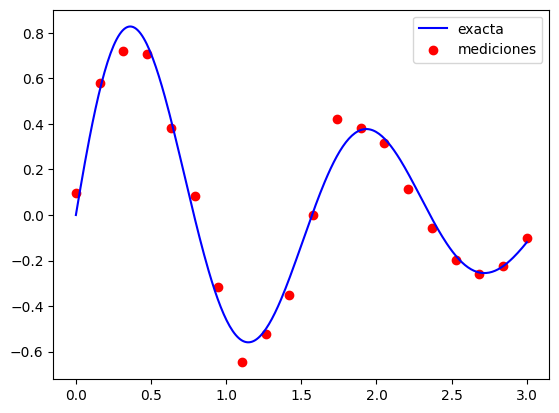

In [5]:
# 3.1), 3.2) y 3.3)
x_data = np.linspace(0,3,20)
w_exacta = [0.5,4]
y_data = np.exp(-w_exacta[0]*x_data) * np.sin(w_exacta[1]*x_data)
noisy_y =  y_data + 0.1 * np.random.normal(size = len(x_data))
#3.4
x_exacta = np.linspace(0,3,300)
y_exacta = np.exp(-w_exacta[0]*x_exacta) * np.sin(w_exacta[1]*x_exacta)
plt.plot(x_exacta,y_exacta,label = "exacta",linestyle = "-",c = "blue")
plt.scatter(x_data,noisy_y,label = "mediciones", linestyle = '-', c = "red")
plt.legend();plt.show()

## Ejercicio 4)

El ajuste de un modelo por cuadrados mínimos, consiste en encontrar el vector de parámetros que minimiza la suma de los cuadrados de las diferencias entre los datos y las predicciones del modelo.
Más precisamente, consiste en minimizar

$$
E(w) = \sum_i (f(x_i,w)-y_i)^2
$$

con respecto a $w$.

**1)** Minimice $E(w)$ utilizando el algoritmo del descenso por el gradiente.
Implemente el algoritmo utilizando `pytorch`. Saque ventaja de la capacidad de `pytorch` de calcular gradientes de manera automática. Utilice un learning rate $\eta=0.001$ y como valores iniciales de $w$, los originales, pero levemente perturbados con un números aleatorios obtenidos de una distribución normal de media $1$ y desviación estandard $0.25$.

**2)** Grafique, utilizando los mismos 300 puntos de antes, la curva ajustada por el algoritmo anterior.

epoca = 0,loss = 2.9369886907452623,w_torch_1 = [0.61270916 2.8656335 ]
epoca = 1,loss = 2.912576713217985,w_torch_1 = [0.6167013 2.8685682]
epoca = 2,loss = 2.8887055334740657,w_torch_1 = [0.6206298 2.8714957]
epoca = 3,loss = 2.8653545927427335,w_torch_1 = [0.6244962 2.874416 ]
w_exacta_1 = [0.5 4. ]
W_ini_1 = [0.61270919 2.8656335 ]
w_torch_1 = [0.47638294 4.025739  ]
w_exacta_1 - w_torch_1 = [ 0.02361706 -0.02573919]
w_exacta_1 - w_ini_1 = [-0.11270919  1.1343665 ]


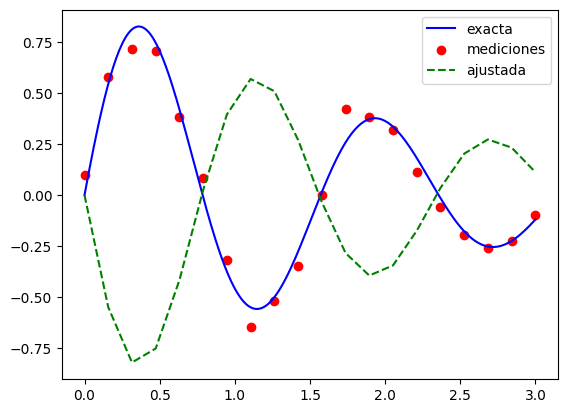

In [ ]:
# 4.1)
lr = 0.001
num_epochs = 3000

w_exacta_1 = [w for w in w_exacta]
w_ini_1 = [p * (1+0.25*np.random.normal()) for p in w_exacta_1]

w_torch_1 = torch.tensor(w_ini_1,requires_grad = True,dtype = torch.float)
x_torch = torch.tensor(x_data,requires_grad = False)
y_torch = torch.tensor(noisy_y,requires_grad = False)

for epoch in range(num_epochs):
    f_torch_1 = torch.exp(-w_torch_1[0]*x_torch) * torch.sin(w_torch_1[1]*x_torch)
    loss_1 = ((f_torch_1 - y_torch)**2).sum() 
    
    loss_1.backward()

    if(epoch%3000 <= 3):
        print(f"epoca = {epoch},loss = {loss_1.item()},w_torch_1 = {w_torch_1.detach().numpy()}")

    with torch.no_grad():
        w_torch_1 -= lr * w_torch_1.grad
        w_torch_1.grad.zero_()

print(f"w_exacta_1 = {np.array(w_exacta_1)}")
print(f"W_ini_1 = {np.array(w_ini_1)}")
print(f"w_torch_1 = {w_torch_1.detach().numpy()}")
print(f"w_exacta_1 - w_torch_1 = {np.array(w_exacta_1) - w_torch_1.detach().numpy()}")
print(f"w_exacta_1 - w_ini_1 = {np.array(w_exacta_1) - np.array(w_ini_1)}")

# 4.2) grafico la curva ajustada utilizando los mismos 300 puntos   
f_torch_1_final = torch.exp(-w_torch_1[0]*x_torch) * torch.sin(w_torch_1[1]*x_torch)
plt.plot(x_exacta,y_exacta,label = "exacta",linestyle = "-",c = "blue")
plt.scatter(x_data,noisy_y,label = "mediciones", linestyle = '-', c = "red")
plt.plot(x_data,f_torch_1_final.detach().numpy(),label = "ajustada", linestyle = '--', c = "green")
plt.legend();plt.show()
  


## Ejercicio 5)

**1)** Repita el ejercicio anterior, pero ahora ajustando el modelo

$$
f(x,w) = \exp(-w_0x+w_2)\sin(w_1x+w_3)
$$

i.e. un modelo con dos parámetros ajustables extra.

**2)** Calcule el error cuadratico medio de ambos modelos, sobre los 30 puntos de entrenamiento y sobre los 300 puntos del la curva exacta.

In [ ]:
# 5.1)